# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub
#from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
#plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


#Dataset

In [0]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
num_classes = 10
original_x_test = x_test
original_y_test = y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
batch_size = 32

epochs = 10

In [0]:
class_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

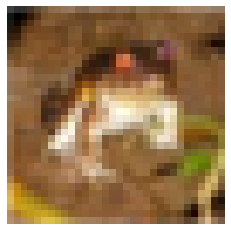

In [8]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [9]:
print(x_train.shape[1:])

(32, 32, 3)


##ConvModel

In [0]:
#https://keras.io/examples/cifar10_cnn/

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [0]:
# model = Sequential([
#     Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0

In [12]:
 history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 111s 2ms/sample - loss: 2.5057 - accuracy: 0.2052 - val_loss: 1.7707 - val_accuracy: 0.3486
Epoch 2/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.7011 - accuracy: 0.3795 - val_loss: 1.4606 - val_accuracy: 0.4671
Epoch 3/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.4344 - accuracy: 0.4893 - val_loss: 1.2350 - val_accuracy: 0.5661
Epoch 4/10
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.2781 - accuracy: 0.5536 - val_loss: 1.1742 - val_accuracy: 0.5978
Epoch 5/10
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.1683 - accuracy: 0.5936 - val_loss: 1.1427 - val_accuracy: 0.6076
Epoch 6/10
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.0836 - accuracy: 0.6286 - val_loss: 1.1657 - val_accuracy: 0.6033
Epoch 7/10
50000/50000 [==========================

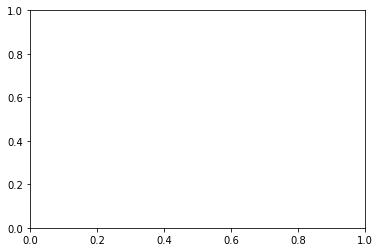

In [13]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

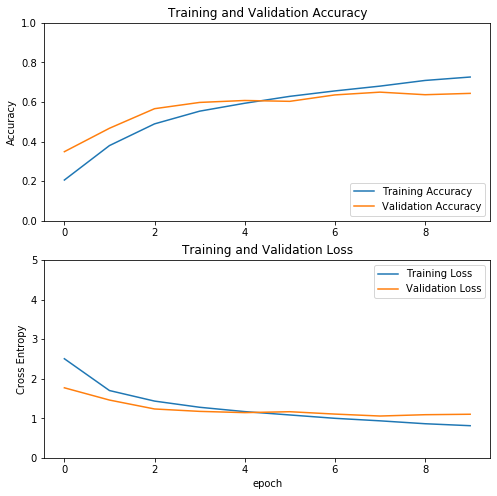

In [14]:
plot_accuracy_and_loss(history, acc_ylim=[0,1.0],loss_ylim=[0,5])

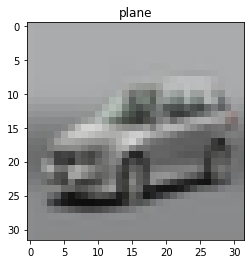


Predicted class is: car


In [39]:
img_index = np.random.randint(x_test.shape[0])
img = x_test[img_index]
predictions = model.predict(tf.expand_dims(img, 0))
plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[int(y_test[img_index][0])])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])